In [1]:
import requests

def make_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

### Her må det legges inn data

In [10]:
# Get price data for month
price_from_fortum_per_kwh = 0.5922
period = '08' 
# Make a list of the days in the month. Make sure to have the right number of days (Days + 1).
days = [str(day).zfill(2) for day in range(1, 32)]


In [11]:
# Get price data for month

month_prices = {}
for day in days:
    url = f"https://www.hvakosterstrommen.no/api/v1/prices/2024/{period}-{day}_NO1.json"
    data = make_request(url)
    if data:
        month_prices[day] = data

print(month_prices)
print(len(month_prices))


{'01': [{'NOK_per_kWh': 0.27914, 'EUR_per_kWh': 0.02348, 'EXR': 11.8885, 'time_start': '2024-08-01T00:00:00+02:00', 'time_end': '2024-08-01T01:00:00+02:00'}, {'NOK_per_kWh': 0.27629, 'EUR_per_kWh': 0.02324, 'EXR': 11.8885, 'time_start': '2024-08-01T01:00:00+02:00', 'time_end': '2024-08-01T02:00:00+02:00'}, {'NOK_per_kWh': 0.27569, 'EUR_per_kWh': 0.02319, 'EXR': 11.8885, 'time_start': '2024-08-01T02:00:00+02:00', 'time_end': '2024-08-01T03:00:00+02:00'}, {'NOK_per_kWh': 0.27332, 'EUR_per_kWh': 0.02299, 'EXR': 11.8885, 'time_start': '2024-08-01T03:00:00+02:00', 'time_end': '2024-08-01T04:00:00+02:00'}, {'NOK_per_kWh': 0.27332, 'EUR_per_kWh': 0.02299, 'EXR': 11.8885, 'time_start': '2024-08-01T04:00:00+02:00', 'time_end': '2024-08-01T05:00:00+02:00'}, {'NOK_per_kWh': 0.27332, 'EUR_per_kWh': 0.02299, 'EXR': 11.8885, 'time_start': '2024-08-01T05:00:00+02:00', 'time_end': '2024-08-01T06:00:00+02:00'}, {'NOK_per_kWh': 0.28437, 'EUR_per_kWh': 0.02392, 'EXR': 11.8885, 'time_start': '2024-08-01T0

### Denne må endres til riktig fil

In [3]:
import json
# Get the file for the month
with open(f'Forbruk_2023-12-31_til_2024-12-31.json', 'r') as file:
    strom_data = json.load(file)

# Now `strom_data` is a Python dictionary that contains the parsed JSON data

In [4]:
timer = strom_data["Years"][0]["Months"][7]["Days"][0]["Hours"]
dager = strom_data["Years"][0]["Months"][7]["Days"]
print(len(timer))
print(len(dager))
print(strom_data["Years"][0]["Months"][7]["Days"][0]["Hours"][0]["Consumption"]["Value"])

24
31
0.68


In [37]:
print(type(strom_data))
print(type(strom_data["Years"][0]["Months"][0]["Days"]))

<class 'dict'>
<class 'list'>


In [13]:
# Check if all days have 24 hours
print(month_prices["01"][0]["NOK_per_kWh"])
len(month_prices["25"])
for day in month_prices:
    print(len(month_prices[day]))

0.27914
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24


In [14]:
# Set the strom_data variable to the parsed JSON data
strom_data_list:list = []
strom_data_list = strom_data["Years"][0]["Months"][7]["Days"]
print(len(strom_data_list))
print(strom_data_list[0])

31
{'Year': 2024, 'Month': 8, 'Day': 1, 'Hours': [{'Year': 2024, 'Month': 8, 'Day': 1, 'Hour': 0, 'IsPublicHoliday': False, 'UseWeekendPrices': False, 'EnergyPrice': None, 'FixedPriceLevel': None, 'TotalPriceCost': None, 'Distribution': None, 'HourCompensation': None, 'SpotPrice': None, 'EnergyPriceCost': None, 'FixedPriceCost': None, 'PowerSupplierCost': None, 'IsPeriodCompleted': False, 'Id': '2024080100', 'Production': None, 'Consumption': {'Value': 0.68, 'IsVerified': True, 'Status': 'OK'}}, {'Year': 2024, 'Month': 8, 'Day': 1, 'Hour': 1, 'IsPublicHoliday': False, 'UseWeekendPrices': False, 'EnergyPrice': None, 'FixedPriceLevel': None, 'TotalPriceCost': None, 'Distribution': None, 'HourCompensation': None, 'SpotPrice': None, 'EnergyPriceCost': None, 'FixedPriceCost': None, 'PowerSupplierCost': None, 'IsPeriodCompleted': False, 'Id': '2024080101', 'Production': None, 'Consumption': {'Value': 1.36, 'IsVerified': True, 'Status': 'OK'}}, {'Year': 2024, 'Month': 8, 'Day': 1, 'Hour': 2, 

In [15]:
# Totalt antall kilowattimer i month
total_days = 0
total_hours = 0
total = 0

for day in strom_data_list:
    total_days += 1
    # add a new key to the dictionary
    for hour in day["Hours"]:
        total_hours += 1
        total += hour["Consumption"]["Value"]

print(total_days)
print(total_hours)
print(f'Totalt antall kwh: {total:.2f}')


31
744
Totalt antall kwh: 1076.83


In [15]:
print(strom_data_list[0]["Hours"])
print (len(strom_data_list[0]["Hours"]))

[{'Year': 2024, 'Month': 1, 'Day': 1, 'Hour': 0, 'IsPublicHoliday': False, 'UseWeekendPrices': False, 'EnergyPrice': None, 'FixedPriceLevel': None, 'TotalPriceCost': None, 'Distribution': None, 'HourCompensation': None, 'SpotPrice': None, 'EnergyPriceCost': None, 'FixedPriceCost': None, 'PowerSupplierCost': None, 'IsPeriodCompleted': False, 'Id': '2024010100', 'Production': None, 'Consumption': {'Value': 3.78, 'IsVerified': True, 'Status': 'OK'}}, {'Year': 2024, 'Month': 1, 'Day': 1, 'Hour': 1, 'IsPublicHoliday': False, 'UseWeekendPrices': False, 'EnergyPrice': None, 'FixedPriceLevel': None, 'TotalPriceCost': None, 'Distribution': None, 'HourCompensation': None, 'SpotPrice': None, 'EnergyPriceCost': None, 'FixedPriceCost': None, 'PowerSupplierCost': None, 'IsPeriodCompleted': False, 'Id': '2024010101', 'Production': None, 'Consumption': {'Value': 2.54, 'IsVerified': True, 'Status': 'OK'}}, {'Year': 2024, 'Month': 1, 'Day': 1, 'Hour': 2, 'IsPublicHoliday': False, 'UseWeekendPrices': Fal

In [16]:
price_object = {}
for day in month_prices:
  hour_prices = {}
  for i, hour in enumerate(month_prices[day]):
    hour_prices[i] = hour["NOK_per_kWh"]
    # print(i, hour["NOK_per_kWh"])
  price_object[day] = hour_prices

print(len(price_object))



31


In [17]:
for day in strom_data_list:

    day_num = str(day["Day"]).zfill(2)
    for i, hour in enumerate(day["Hours"]):
        hour["SpotPrice"] = price_object[day_num][i]

In [18]:
print(strom_data[0]["Hours"][10])

KeyError: 0

In [19]:
day_data = []
for i, day in enumerate(strom_data_list):
    kwh = 0
    cost = 0
    for hour in day["Hours"]:
        kwh += hour["Consumption"]["Value"]
        cost += hour["Consumption"]["Value"] * hour["SpotPrice"]
    day_data.append({"Day": day["Day"], "KWH": kwh, "Cost": cost})
print(day_data[:1])
    

[{'Day': 1, 'KWH': 16.26, 'Cost': 4.6866235}]


In [20]:
# My actual consumption

# Calculate total cost and total kwh for the month
total_kwh = 0
total_cost = 0
num_days = 0
for day in day_data:
    num_days += 1
    total_kwh += day["KWH"]
    total_cost += day["Cost"]

# Calculate average cost per kwh
average_cost = total_cost / total_kwh

# Calculate average price per kwh
average_price = total_cost / num_days

total_cost_incl_mva = total_cost * 1.25
average_cost_incl_mva = average_cost * 1.25

print(f"Totalt antall dager: {num_days}")
print(f"Totalt antall kwh: {total_kwh:.2f}")
print(f"Totalt antall kroner: {total_cost:.2f}")
print(f"Totalt antall kroner inkl mva: {total_cost_incl_mva:.2f}")
print(f"Gjennomsnittlig pris per kwh forbrukt i øre: {average_cost*100:.2f}")
print(f"Gjennomsnittlig pris per kwh ink mva i øre: {average_cost*1.25*100:.2f}")
print(f"Gjennomsnittlig pris for måneden per dag: {average_price:.2f}")



Totalt antall dager: 31
Totalt antall kwh: 1076.83
Totalt antall kroner: 121.73
Totalt antall kroner inkl mva: 152.17
Gjennomsnittlig pris per kwh forbrukt i øre: 11.30
Gjennomsnittlig pris per kwh ink mva i øre: 14.13
Gjennomsnittlig pris for måneden per dag: 3.93


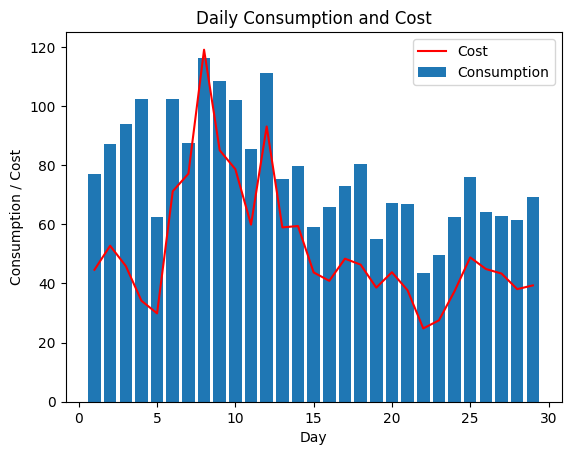

In [93]:
import matplotlib.pyplot as plt

# Extract the day and consumption values from the day_data list
days = [day["Day"] for day in day_data]
consumption = [day["KWH"] for day in day_data]
cost = [day["Cost"] for day in day_data]

# Plot the bar chart for consumption
plt.bar(days, consumption, label='Consumption')

# Plot the line chart for cost
plt.plot(days, cost, color='r', label='Cost')

plt.xlabel("Day")
plt.ylabel("Consumption / Cost")
plt.title("Daily Consumption and Cost")
plt.legend()
plt.show()


In [67]:
import sys
print(sys.executable)

/home/eivind/strom/env/bin/python


In [21]:
print(month_prices["01"][1]["NOK_per_kWh"])
price_01 = 0
hours_01 = 0
# Get the average price for the given day of month including VAT
for price in month_prices["19"]:
    hours_01 += 1
    price_01 += price["NOK_per_kWh"]
print(f'Gjennomsnitt per dag ex mva: {(price_01 / hours_01)}')  
print(f'Gjennomsnitt per dag ink mva: {(price_01 / hours_01)*1.25}')    

0.27629
Gjennomsnitt per dag ex mva: 0.11298416666666665
Gjennomsnitt per dag ink mva: 0.1412302083333333


In [22]:
# Calculate the average price and cost for the month using the average spotprice 

day_average = []
hours_month = 0
cost = 0
for i, day in enumerate(strom_data_list):
    for hour in day["Hours"]:
        hours_month += 1
        cost += hour["SpotPrice"]
    day_average.append({"Day": day["Day"], "KWH": kwh, "Cost": cost})

daily_average = cost / hours_month*100
daily_average_incl_mva = daily_average * 1.25

print(day_average[0])
print(hours_month)
print("Ved gjennomsnittlig spotpris:")
print(f"Gjennomsnittlig pris per kwh: {daily_average:.2f}")
print(f"Gjennomsnittlig pris per kwh ink mva i øre: {daily_average_incl_mva:.4f}")
print(f'Totale kostnader ved gjennomsnittspris: {daily_average*total_kwh/100:.2f}')
print(f'Totale kostnader ved gjennomsnittspris ink mva: {daily_average_incl_mva*total_kwh/100:.2f}')
# print(cost/hours_month)



{'Day': 1, 'KWH': 40.480000000000004, 'Cost': 6.9224299999999985}
744
Ved gjennomsnittlig spotpris:
Gjennomsnittlig pris per kwh: 12.86
Gjennomsnittlig pris per kwh ink mva i øre: 16.0741
Totale kostnader ved gjennomsnittspris: 138.47
Totale kostnader ved gjennomsnittspris ink mva: 173.09


In [96]:
print(f"Nummer for måneden: {period}")
print(f"Totalt antall dager i måneden: {num_days}")
print(f"Totalt antall kwh: {total_kwh:.2f}\n")

print("\033[1m" + "Mitt faktiske forbruk:" + "\033[0m")
print(f"Totalt antall kroner: {total_cost:.2f}")
print(f"Totalt antall kroner inkl mva: {total_cost_incl_mva:.2f}\n")

print(f"Gjennomsnittlig pris per kwh forbrukt i øre: {average_cost*100:.2f}")
print(f"Gjennomsnittlig pris per kwh ink mva i øre: {average_cost*1.25*100:.2f}")
print(f"Gjennomsnittlig pris for måneden per dag: {average_price:.2f}\n")

print("\033[1m" + "Ved gjennomsnittlig spotpris:" + "\033[0m")
print(f'Totale kostnader ved gjennomsnittspris: {daily_average*total_kwh/100:.2f}')
print(f'Totale kostnader ved gjennomsnittspris ink mva: {daily_average_incl_mva*total_kwh/100:.2f}\n')
print(f"Gjennomsnittlig pris per kwh: {daily_average:.2f}")
print(f"Gjennomsnittlig pris per kwh ink mva i øre: {daily_average_incl_mva:.4f}\n")

print("\033[1m" + "Delta mellom fakturert og faktisk ved spot:" + "\033[0m")
print(f"Totalt antall kroner uten mva: {(total_cost-price_from_fortum_per_kwh*total_kwh):.2f}")
print(f"Totalt antall kroner inkl mva: {(total_cost_incl_mva-price_from_fortum_per_kwh*total_kwh*1.25):.2f}\n")


Nummer for måneden: 02
Totalt antall dager i måneden: 29
Totalt antall kwh: 2248.18

Mitt faktiske forbruk:
Totalt antall kroner: 1513.63
Totalt antall kroner inkl mva: 1892.04

Gjennomsnittlig pris per kwh forbrukt i øre: 67.33
Gjennomsnittlig pris per kwh ink mva i øre: 84.16
Gjennomsnittlig pris for måneden per dag: 52.19

Ved gjennomsnittlig spotpris:
Totale kostnader ved gjennomsnittspris: 1505.76
Totale kostnader ved gjennomsnittspris ink mva: 1882.21

Gjennomsnittlig pris per kwh: 66.98
Gjennomsnittlig pris per kwh ink mva i øre: 83.7213

Delta mellom fakturert og faktisk ved spot:
Totalt antall kroner uten mva: -152.72
Totalt antall kroner inkl mva: -190.90



In [71]:
print("\033[1m" + "Mitt faktiske forbruk:" + "\033[0m")

Mitt faktiske forbruk:
